# Comparative Data  Analysis of a Home Made Ekar detector vs OULU: Response to the Forbush Decrease generated by the X-Flare of 2026-01-18

1. **Analysis Objective**

	* Validate and characterize the **Ekar** muon detector (low statistics $\approx 230$ CPM) by comparing it with the **OULU** neutron monitor (high statistics $\approx 5000$ CPM, scientific standard), during a significant solar activity event (*Forbush Decrease*).
	
	* Quantify **how** the different physics (Muons vs Neutrons) and the different geographical position influence the measurements.



2. **Methodology**

	Since **OULU** has a much higher temporal and statistical resolution, several *resampling* and *scaling* steps are performed:
	
	- **Resampling:** transformation of high-frequency **OULU** data into an hourly *confidence band* (Min-Max and IQR).
	
	- **Scaling:** Estimation of the coefficient $k \approx 0.043$ to bring the **OULU** signal intensity to the **Ekar** scale.
	
	The assumption is: if **Ekar** measured exactly the same physics as **OULU**, its signal should remain confined within this band.



3. **Performed Analyses**

	Three main analyses were performed, each with a specific purpose:
	
	1. **Positioning Analysis (Fan Chart)**
	
		Verification of signal stability and response to the event, by superimposing the **Ekar** trend on the **OULU** confidence bands.
	
		**Result:**
		
		- In the quiet phase, **Ekar** navigates stably within the band.
		
		- During the *Forbush Decrease*, **Ekar** exits the band going into **Overshoot**.
		
		**Interpretation:** **Ekar** undergoes a smaller percentage decrease compared to **OULU** because muons, generated by more energetic primary cosmic rays, are less influenced by the Earth's magnetic field.
	
	1. **Cross-Correlation**
	
		Quantify the time delay between the two instruments, due to the different geographical position, via cross-correlation on hourly data.
		
		**Result:** there is a systematic delay of **+2 hours** for **Ekar** compared to **OULU**.
		
		**Interpretation:** This delay is the sum of two factors:
		
		1. **Earth Rotation:** Longitude difference (~1 hour).
		
		2. **Physics (Rigidity):** The different curvature of particles in the Earth's magnetic field causes **Ekar** to "look" in a different asymptotic direction.
		
		_This result is confirmed by a previous analysis comparing the day-night trend of counts for the two detectors._

	1. **Phase Space**
	
		Study the dynamics of the event, i.e., how the system reacts and recovers, by plotting **OULU** on the $x$ axis and **Ekar** on the $y$ axis, coloring the points based on time.
		
		**Result:** a **hysteresis cycle** is visible, a counter-clockwise loop instead of a straight line.
		
		**Interpretation:** **Ekar** recovers the pre-event signal level much faster than **OULU**. High-energy particles feel the magnetic disturbance less than low-energy ones.    


4. **Conclusions**
	
	Despite the low statistics and intrinsic noise (requiring smoothing like the moving average), **Ekar is validated** and _sees the same physics as **OULU**_. 
	
	The fundamental difference is the **Cutoff Rigidity** $R_c$:
	
	- **OULU (~0.8 GV):** Measures neutrons generated by low-energy primaries. It is extremely sensitive to solar variations with deep peaks and slower recoveries.
	
	- **Ekar (~4.0 GV):** Measures muons generated by high-energy primaries. It is less sensitive with less marked peaks during solar storms and fast recoveries.
		
	Finally, the 2-hour delay is not a defect, but a characteristic of its acceptance cone in the geomagnetic field and relative position.
	
    In conclusion, **Ekar** is just a complementary instrument to probe a more energetic portion of the cosmic ray spectrum.

In [7]:
# --- import ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker

# caricamento dei file sui df e conversione della data a indice del df
df_ekar = pd.read_csv("ekar.txt", sep="\t", decimal=',')
df_ekar['Date'] = pd.to_datetime(df_ekar['Date'], dayfirst=True)
df_ekar.set_index('Date', inplace=True)
display(df_ekar.head(5))

df_oulu = pd.read_csv("oulu.txt", sep=";", decimal=',')
df_oulu['Date'] = pd.to_datetime(df_oulu['Date'])
df_oulu.set_index('Date', inplace=True)
display(df_oulu.head(5))

,Temp,Press,Counts,PCC,Err PCC,PTCC,Err PTCC
Date,,,,,,,
2026-01-17 08:00:00,19.0,869.39,13933,14062.15,119.37,14151.48,118.42
2026-01-17 09:00:00,19.3,869.71,14063,14201.14,119.38,14298.20,118.43
2026-01-17 10:00:00,19.3,869.93,14045,14188.30,119.38,14285.28,118.43
2026-01-17 11:00:00,19.5,869.65,13772,13905.85,119.35,14005.38,118.41
2026-01-17 12:00:00,19.7,869.24,13833,13957.64,119.36,14062.04,118.41


,Counts
Date,
2026-01-17 08:00:00,91.601
2026-01-17 08:01:00,91.659
2026-01-17 08:02:00,93.146
2026-01-17 08:03:00,93.522
2026-01-17 08:04:00,90.798


In [8]:
# scelgo i conteggi di Ekar da utilizzare PTCC (Pressure Temperature Corrected Counts)
ekar_counts = 'PTCC'

# scalo Ekar a conteggi al minuto dato che integra ogni ora
df_ekar[ekar_counts] /= 60 # min

# scalo OULU a conteggi al minuto dato che riporta conteggi al secondo
df_oulu['Counts'] *= 60 # sec

# coefficente per scalare i conteggi di OULU a quelli di Ekar
k = df_ekar['PTCC'].mean() / df_oulu['Counts'].mean()

## Fan Chart

Compliance Statistics (Ekar vs OULU):
 - Ekar outside IQR: 57.2% of the time
 - Ekar outside extremes (Min-Max): 8.2% of the time


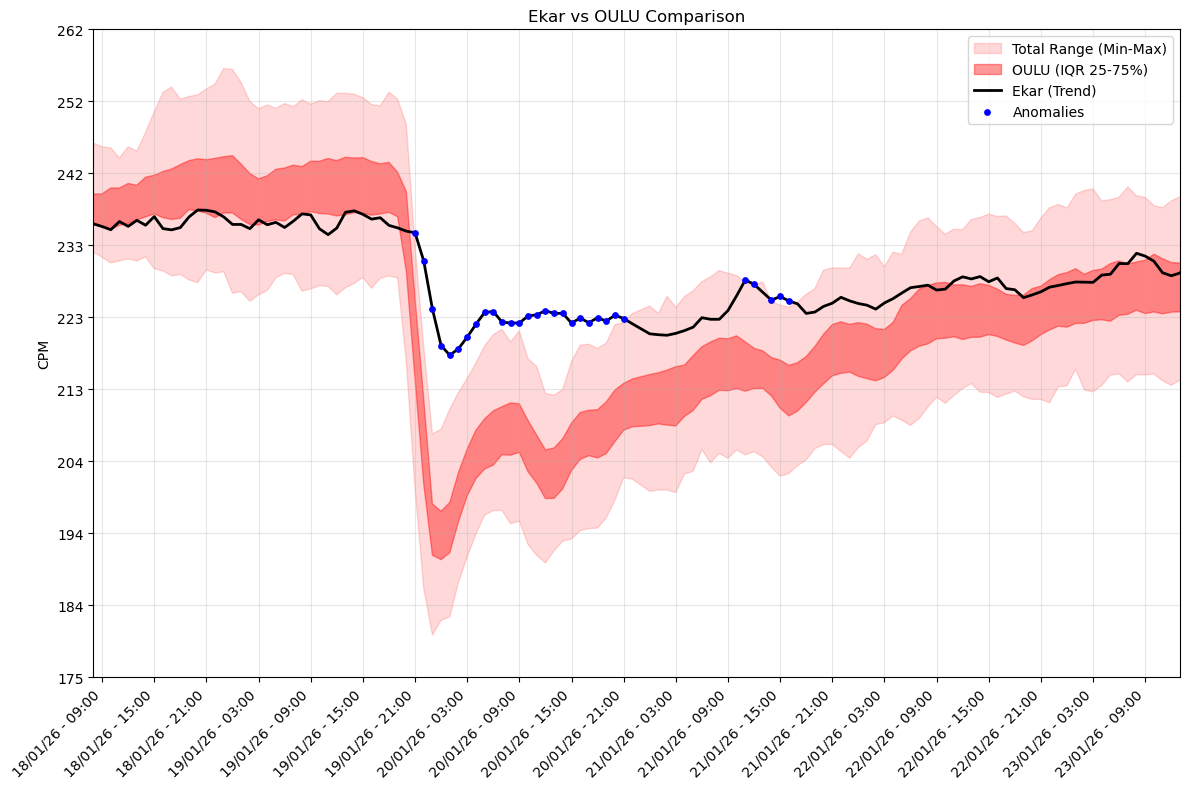

In [9]:
# --- Preparazione delle Bande di OULU ---
# metriche: Min, Max, 25% (Q1), 75% (Q3)
oulu_stats = df_oulu['Counts'].resample('1h').agg([
    'min', 
    'max', 
    'mean',
    lambda x: x.quantile(0.25), 
    lambda x: x.quantile(0.75)
])

# rinomino le colonne dei quantili per comodità
oulu_stats.columns = ['min', 'max', 'mean', 'q25', 'q75']
oulu_stats = oulu_stats.rolling(window=3, center=True).mean()

# applico lo scaling con k
oulu_scaled = oulu_stats * k

# media mobile a 3 punti per smussare Ekar
ekar_smooth = df_ekar[ekar_counts].rolling(window=3, center=True).mean()

# prendo gli indici comuni
common_idx = oulu_scaled.index.intersection(ekar_smooth.index)
oulu_final = oulu_scaled.loc[common_idx]
ekar_final = ekar_smooth.loc[common_idx]

# --- Calcolo Statistiche "Out of Band" ---
# calcolo delle volte in cui Ekar esce dal IQR di OULU
is_out_iqr = (ekar_final < oulu_final['q25']) | (ekar_final > oulu_final['q75'])
pct_out_iqr = is_out_iqr.mean() * 100

# calcolo delle volte in cui Ekar esce dal Min-Max di OULU
is_out_total = (ekar_final < oulu_final['min']) | (ekar_final > oulu_final['max'])
pct_out_total = is_out_total.mean() * 100

print(f"Compliance Statistics (Ekar vs OULU):")
print(f" - Ekar outside IQR: {pct_out_iqr:.1f}% of the time")
print(f" - Ekar outside extremes (Min-Max): {pct_out_total:.1f}% of the time")

# --- Plotting ---
fig, ax = plt.subplots(figsize=(12, 8))

# banda totale (Min-Max)
ax.fill_between(oulu_final.index, 
                oulu_final['min'], 
                oulu_final['max'], 
                color='red', alpha=0.15, label='Total Range (Min-Max)')

# banda centrale (IQR)
ax.fill_between(oulu_final.index, 
                oulu_final['q25'], 
                oulu_final['q75'], 
                color='red', alpha=0.4, label='OULU (IQR 25-75%)')

# Ekar (Media Mobile)
ax.plot(ekar_final.index, ekar_final, color='black', lw=2, label='Ekar (Trend)')

# i punti dove Ekar esce dal Min-Max
outliers = ekar_final[is_out_total]
ax.scatter(outliers.index, outliers, color='blue', s=15, zorder=5, label='Anomalies')

ax.set_ylabel("CPM")
ax.set_title(f"Ekar vs OULU Comparison")
ax.legend(loc='upper right')
ax.grid(True, alpha=0.3)

# scelgo il range di dati di interesse
t_start = pd.Timestamp("2026-01-18 08:00:00")
t_end   = pd.Timestamp("2026-01-23 13:00:00")
ax.set_xlim(t_start, t_end)

start, end = ax.get_ylim()
ax.yaxis.set_ticks(np.linspace(round(start-2,0), round(end+1,0), 10))
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))
ax.xaxis.set_major_locator(mdates.HourLocator(interval=6))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d/%m/%y - %H:%M'))
plt.setp(ax.get_xticklabels(), rotation=45, ha='right')
plt.tight_layout()

plt.tight_layout()
plt.show()

Observing the graph above:

1. **Before the event:** **Ekar** navigates stably in the lower part of the dark red band (IQR). It is slightly below the **OULU** median, but solidly within range.
    
2. **The Event (Negative Peak):** The blue points (anomalies) explode exactly during the _Forbush Decrease_. **Ekar** completely exits not only the IQR but also the total range. This behavior is due to muon physics, as they are modulated with different intensity compared to neutrons.
    
3. **Recovery:** **Ekar** slowly re-enters the band, moving from the lower edge (pre-event) to the upper edge (post-event).
    

To investigate further what happens when Ekar gets too close to the extremes, we proceed with a **Relative Positioning Chart**.

**The Metric: Positioning Score ($P$)**

We define for each hour $t$:

$$P(t) = \frac{E(t) - O_{min}(t)}{O_{max}(t) - O_{min}(t)}$$

Where:

- $O_{min}$ and $O_{max}$ are the extremes of the pink band (scaled **OULU**).
    
- $E(t)$ is the **Ekar** value (moving average)

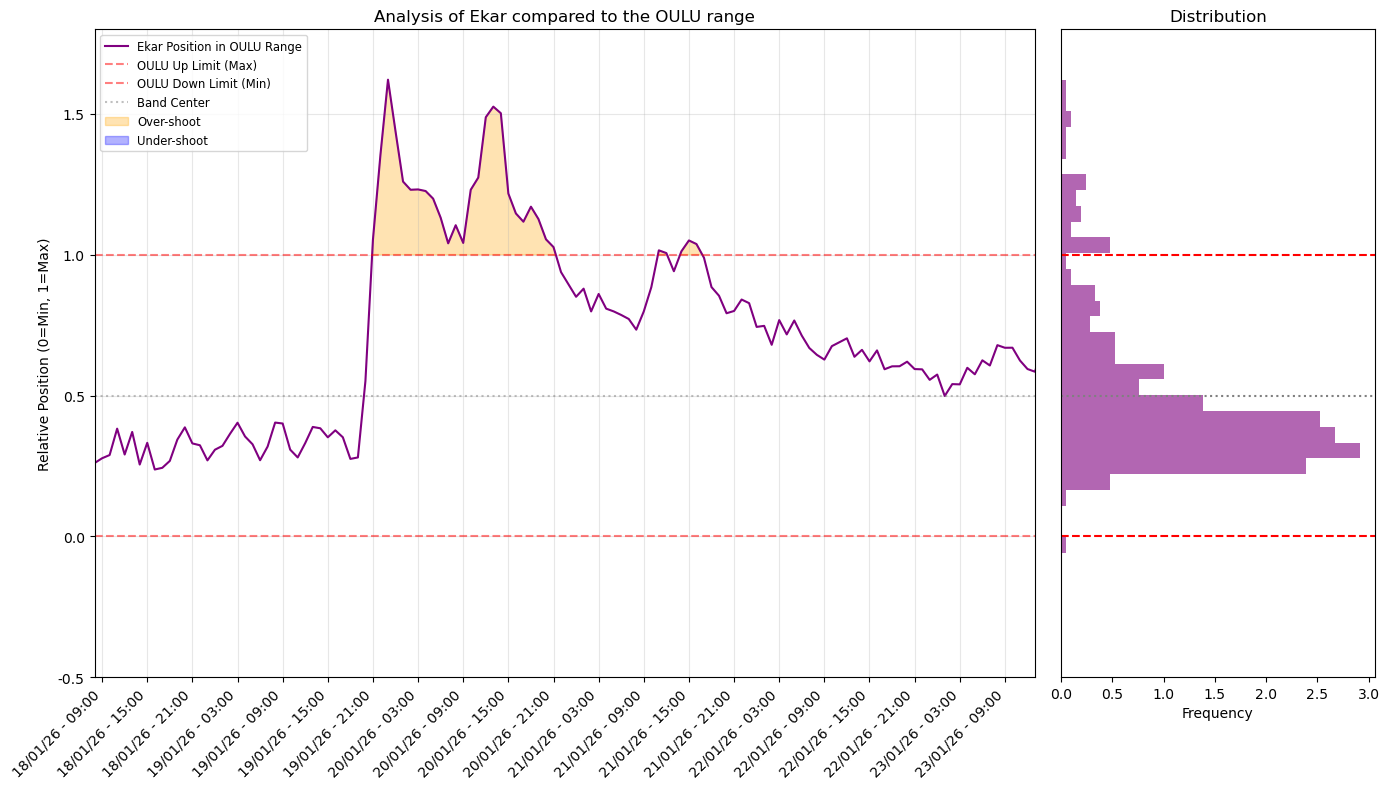

In [10]:
# calcolo l'ampiezza della banda OULU in ogni istante
band_width = oulu_final['max'] - oulu_final['min']

# calcolo dove cade Ekar in percentuale rispetto al min e max di OULU
# P = (Ekar - Min) / (Max - Min)
relative_position = (ekar_final - oulu_final['min']) / band_width

# --- Plotting (Due pannelli: Time Series + Istogramma) ---
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 8), gridspec_kw={'width_ratios': [3, 1]})

# --- Pannello 1: Evoluzione Temporale ---
ax1.plot(relative_position.index, relative_position, color='purple', lw=1.5, label='Ekar Position in OULU Range')

# bordi della banda OULU che ora sono le linee 0 e 1
ax1.axhline(1, color='red', linestyle='--', alpha=0.5, label='OULU Up Limit (Max)')
ax1.axhline(0, color='red', linestyle='--', alpha=0.5, label='OULU Down Limit (Min)')
ax1.axhline(0.5, color='gray', linestyle=':', alpha=0.5, label='Band Center')

# evidenzio le aree fuori dalla banda
ax1.fill_between(relative_position.index, 1, relative_position, 
                 where=(relative_position > 1), color='orange', alpha=0.3, interpolate=True, label='Over-shoot')
ax1.fill_between(relative_position.index, 0, relative_position, 
                 where=(relative_position < 0), color='blue', alpha=0.3, interpolate=True, label='Under-shoot')

ax1.set_title("Analysis of Ekar compared to the OULU range")
ax1.set_ylabel("Relative Position (0=Min, 1=Max)")
ax1.set_ylim(-0.5, 1.8) 
ax1.legend(loc='upper left', fontsize='small')
ax1.grid(True, alpha=0.3)

#t_start = pd.Timestamp("2026-01-17 08:00:00")
#t_end   = pd.Timestamp("2026-01-23 13:00:00")
ax1.set_xlim(t_start, t_end)

ax1.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.1f'))
ax1.xaxis.set_major_locator(mdates.HourLocator(interval=6))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d/%m/%y - %H:%M'))
plt.setp(ax1.get_xticklabels(), rotation=45, ha='right')
plt.tight_layout()

# --- Pannello 2: Distribuzione (Istogramma) ---
ax2.hist(relative_position.dropna(), bins=30, orientation='horizontal', color='purple', alpha=0.6, density=True)
ax2.axhline(1, color='red', linestyle='--')
ax2.axhline(0, color='red', linestyle='--')
ax2.axhline(0.5, color='gray', linestyle=':')
ax2.set_title("Distribution")
ax2.set_xlabel("Frequency")
ax2.set_ylim(ax1.get_ylim()[0], ax1.get_ylim()[1])
ax2.set_yticks([]) # i tick y  sono condivisi
plt.tight_layout()
plt.show()

Observing the _yellow peak_ on the graph above:

- **Mathematically:** $E(t) > O_{max}(t)$.
    
- **Physically:** A _Forbush Decrease_ occurred.
    
    - **OULU** dropped drastically.
        
    - **Ekar** dropped much less, because its particles are more energetic and are less affected by the disturbed solar magnetic field.
        
- **Visual Result:** Since **OULU** dropped much more than **Ekar**, the **OULU** band is below the **Ekar** line. This overshoot represents the **hardness of the measured spectrum**; muons are "harder" than neutrons.

## Cross-Correlation

To mathematically calculate by **how many minutes/hours** Ekar lags or leads (_lag_) relative to OULU, the **Cross-Correlation Function (CCF)** is used:

$$R_{xy}(\tau) = \int_{-\infty}^{\infty} x(t) y(t+\tau) \,dt$$

If the peak of the integral is at $x=0$, the two signals are synchronous.

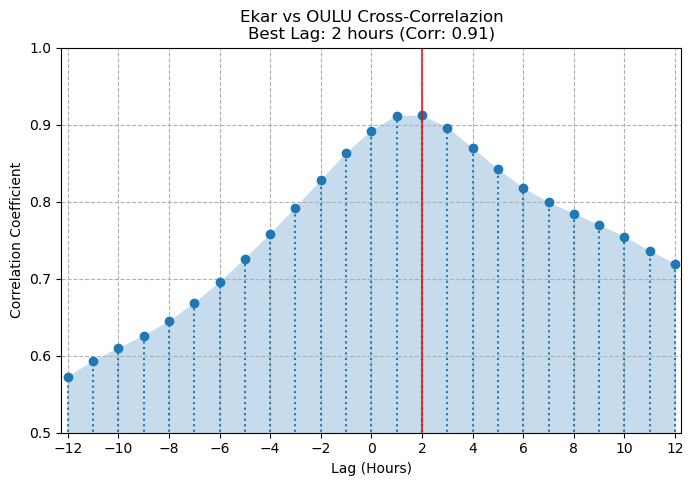

In [11]:
# rimuovo i NaN per il calcolo
s1 = ekar_smooth.dropna() # Ekar (segnale test)
s2 = oulu_scaled['mean'].dropna() # OULU (segnale riferimento)

# allineo sugli indici comuni
common_idx = s1.index.intersection(s2.index)
s1 = s1.loc[common_idx]
s2 = s2.loc[common_idx]

# normalizzazione Z-score per confrontare solo le forme d'onda
s1_norm = (s1 - s1.mean()) / s1.std()
s2_norm = (s2 - s2.mean()) / s2.std()

# --- Calcolo Cross-Correlazione ---
# intervallo di integrazione tra -12 ore e +12 ore
lags = np.arange(-12, 13) # su arange devo usare `stop+1`
correlations = []

for lag in lags:
    corr = s1_norm.corr(s2_norm.shift(lag)) # shift s2 (OULU)
    correlations.append(corr)

# trovo il lag con la correlazione maggiore
best_lag = lags[np.argmax(correlations)]
max_corr = max(correlations)

# --- Plotting ---
fig, ax = plt.subplots(figsize=(8, 5))
ax.fill_between(lags, correlations, alpha=0.25)
ax.stem(lags, correlations, linefmt=':', markerfmt='o', basefmt=' ')
ax.set_xlabel("Lag (Hours)")
ax.set_ylabel("Correlation Coefficient")
ax.set_title(f"Ekar vs OULU Cross-Correlazion\nBest Lag: {best_lag} hours (Corr: {max_corr:.2f})")
ax.xaxis.set_ticks(np.arange(lags[0], lags[-1]+1, 2))
ax.set_ylim(0.5,1)
ax.set_xlim(lags[0]-0.25,lags[-1]+0.25)
ax.grid(True, linestyle='--')

# evidenzio il picco
ax.axvline(best_lag, color='red', linestyle='-', alpha=0.75)

plt.show()

Observing the graph above, we have:
 - A **peak** exactly at **+2 hours**. 
 - A very high **correlation** $R = 0.91$, confirming that the waveform is almost identical, but temporally shifted.
 
During the Forbush event, the interplanetary magnetic disturbance was "seen" by **Ekar** two hours after **OULU**. The main reason is the **Asymptotic Direction**: The two instruments look in different directions in space. Furthermore, the time delay depends on two factors:

1. **Longitude Difference:** The Earth rotates by $\omega=15^\circ/h$.
 - OULU Longitude: $25.47^\circ$ E
 
 - Ekar Longitude: $11.57^\circ$ E
 
 - $\Delta \text{Long} = 13.9^\circ$. 
 
 Since the Earth rotates from West to East, the Sun (and the anisotropy of cosmic rays) passes first over **OULU** and then over **Ekar**. 
 $$\Delta t=\frac{\Delta \text{Long}}{\omega } = \frac{13.9^\circ}{15^\circ/h} \approx 0.93 \text{ hours } (56 \text{ minutes} )$$
 _Just for the position, Ekar should be delayed by about 1 hour._
1. **Rigidity Difference (Magnetic Deflection):** Charged particles are curved by the Earth's magnetic field _before_ reaching the instrument. This curvature depends on their energy ($R_c$).
 - The primary cosmic rays generating **OULU** neutrons ($R_c=0.81$ GV) are very "soft" and undergo strong deflection.
 
 - The primary cosmic rays generating **Ekar** muons ($R_c=4.70$ GV) are "harder" and are deflected differently.
 
 This difference causes **Ekar** to be "looking" in a different *asymptotic direction* compared to its local vertical, accumulating that extra hour of delay.

## Phase Space

Since the descent behavior is different from the ascent behavior, the *phase diagram* will visually show the cycle the system has traveled. If it were a simple linear system without phase shifts, a line would appear on the graph. Knowing that *a phase shift exists*, what is expected is a ring representing the *memory* of the system (high-energy particles recover sooner).

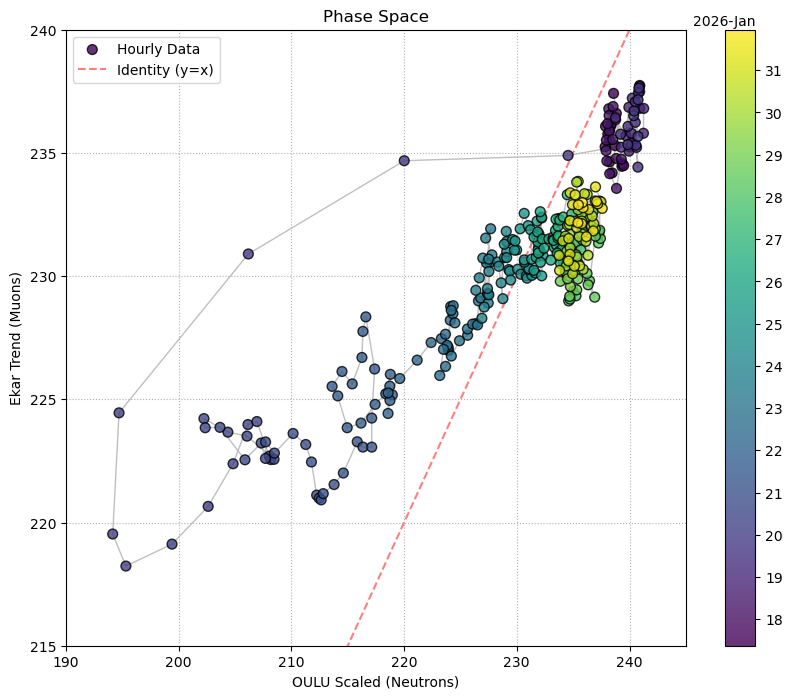

In [12]:
x_val = oulu_final.loc[:'2026-01-31','mean'].dropna()
y_val = ekar_final.loc[:'2026-01-31'].dropna()

# creo una mappa di colori basata sul tempo per vedere l'evoluzione
times = mdates.date2num(x_val.index)

# --- Plotting ---
fig, ax = plt.subplots(figsize=(10, 8))

sc = ax.scatter(x_val, y_val, c=times, cmap='viridis', alpha=0.8, s=50, edgecolors='k', zorder=2, label='Hourly Data')
# linea sottile per mostrare l'ordine temporale
ax.plot(x_val, y_val, color='gray', alpha=0.5, lw=1, zorder=1)

# aggiungo la linea di identità ideale (y=x)
lims = np.array([
    np.min([ax.get_xlim(), ax.get_ylim()]),  
    np.max([ax.get_xlim(), ax.get_ylim()]), 
])
ax.plot(lims, lims, 'r--', alpha=0.5, zorder=0, label='Identity (y=x)')

# linea di regressione lineare
#m, q = np.polyfit(x_val.dropna(), y_val.dropna(), deg=1)
#ax.plot(lims, m*lims + q, 'g--', alpha=0.75, zorder=3, label=f'Regressione Lineare m={round(m,2)}, q={round(q,2)}')

#ax.set_aspect('equal') # importante per non distorcere il loop
ax.set_ylim(215, 240) 
ax.set_xlim(190, 245) 

# formattazione colorbar con date leggibili
cbar = plt.colorbar(sc, ax=ax)
loc = mdates.AutoDateLocator()
cbar.ax.yaxis.set_major_locator(mdates.DayLocator(interval=1))
cbar.ax.yaxis.set_major_formatter(mdates.ConciseDateFormatter(loc))

ax.set_xlabel('OULU Scaled (Neutrons)')
ax.set_ylabel('Ekar Trend (Muons)')
ax.set_title('Phase Space')
ax.legend()
ax.grid(True, linestyle=':')

plt.show()

Observing the graph above:

The ideal identity represents the condition in which **Ekar** and **OULU** were the same instrument. Obviously, this is not the case, and when the event begins (from purple points to blue/light blue points), we observe:

- **Marked Horizontal Movement:** The points shift sharply to the left (**OULU** drops from ~240 to ~195 CPM).
    
- **Minimal Vertical Movement:** **Ekar** barely drops (from ~238 to ~218 CPM).
    
    The phase space is deformed _above_ the red line, and in the _recovery_ phase (points from dark blue to green/yellow):
    
- The points do not return along the same path as the descent but form an **upper arc**.
    
- **Yellow Points (End of Event):** Compared to the dark purple ones (start), the yellow points are at almost the same $y$ height (**Ekar** recovers faster), but they are still shifted to the left on the $x$ axis (**OULU** recovers more slowly).
    
    This is typical of Forbush Decreases: high energies recover in 1-2 days, while low energies may take 4-5 days or more.